- Covariance
  - Indicates the relationship and direction between two variables
  - Correlation Coefficient
     - Positive: Both variables increase/decrease together
     - Negative: One variable increases when another variable decreases

- Correlation Matrix
  - The normalization of covariance
  - Show linear relationships between variables
  - Standardize the covariance matrix -> to show the Correlation Coefficients between variables
  - Correlation Coefficient (Between -1 and +1)
     - +1: Strong positive correlation
     - 0: No linear relationship
     - -1: Strong negative correlation

# 1. Basics

In [1]:
# Import modules
import numpy as np

In [2]:
# Generate data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
z = np.array([3, 6, 9, 12, 15])

x, y, z

(array([1, 2, 3, 4, 5]),
 array([ 2,  4,  6,  8, 10]),
 array([ 3,  6,  9, 12, 15]))

In [7]:
# Calculate Covariance
cov_matrix = np.cov([x, y, z])

print('Covariance Matrix:')
print(cov_matrix)

# Result:
# '(1,1)=10' => Covariance of variable Y and its own variable Y

Covariance Matrix:
[[ 2.5  5.   7.5]
 [ 5.  10.  15. ]
 [ 7.5 15.  22.5]]


In [6]:
# Calculate Correlation Matrix
cor_matrix = np.corrcoef([x, y, z])

print('Correlation Matrix: ')
print(cor_matrix)

Correlation Matrix: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


# 2. Select Variables and Determine Multicollinearity

In [8]:
# Import modules
import numpy as np

In [11]:
# Generate data
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([2, 4, 6, 8, 10])
x3 = np.array([3, 6, 9, 12, 15])

x1, x2, x3

(array([1, 2, 3, 4, 5]),
 array([ 2,  4,  6,  8, 10]),
 array([ 3,  6,  9, 12, 15]))

In [12]:
# Create a matrix
data = np.vstack([x1, x2, x3])

data

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15]])

In [16]:
# Calculate Correlation Coefficient Matrix
cor_matrix = np.corrcoef(data, rowvar=False)  # 'rowvar': An option whether the Correlation Coefficients are computed or not

print('Correlation Coefficients: ')
print(cor_matrix)

Correlation Coefficients: 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [17]:
# Determine Multicollinearity
threshold = 0.7

print('\nVariables with High Multicollinearity: ')
for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i, j]) > threshold:
            print(f'Variable {i+1} and Variable {j+1}')
            

# Result: There's a high multicollinearity


Variables with High Multicollinearity: 
Variable 1 and Variable 2
Variable 1 and Variable 3
Variable 1 and Variable 4
Variable 1 and Variable 5
Variable 2 and Variable 3
Variable 2 and Variable 4
Variable 2 and Variable 5
Variable 3 and Variable 4
Variable 3 and Variable 5
Variable 4 and Variable 5


# 3. Dimension Reduction

In [23]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Generate data
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
x3 = np.random.normal(0, 1, 100)

x1, x2, x3

(array([ 0.77285479,  0.00529994,  0.78083228,  0.73110966, -0.19648466,
        -1.93905854, -0.10326973,  1.35126118,  0.02293421,  0.15204644,
        -0.91654456,  2.34018096, -0.6994659 ,  0.12854695, -0.74837809,
        -0.01211049, -1.69430192, -0.81360384, -0.68171489, -0.36379622,
        -0.59380409,  0.38298516,  1.75273048, -0.08263337,  0.44431111,
        -0.25395491,  1.40420359, -0.01952881,  0.7266569 ,  1.48906456,
        -0.40791572, -0.57931597,  0.8005555 , -1.4857369 , -1.15427673,
        -1.04565651, -1.44063792, -1.06629545, -1.26246805,  0.57774193,
        -0.68593579, -0.27120025,  1.7089473 ,  0.62497759, -1.65822655,
        -1.55964526, -0.42327878, -1.36202791, -0.25213194,  1.26169027,
        -1.47563261,  0.84488555, -1.69237078,  0.05592695,  0.13080937,
         0.50392139,  2.22770373, -0.35839203,  1.21780233, -0.42554968,
        -0.28762706, -0.47124988, -0.0144256 ,  0.24165041, -1.88943081,
        -0.5960994 ,  1.78870496, -0.17813852, -0.3

In [26]:
# Create a data matrix
data = np.vstack([x1, x2, x3]).T

data

array([[ 0.77285479, -0.78511166, -0.84629947],
       [ 0.00529994,  0.54812458, -0.3446794 ],
       [ 0.78083228,  2.59308112, -1.01584591],
       [ 0.73110966,  2.07804612,  0.02878218],
       [-0.19648466,  0.61054144, -0.61390175],
       [-1.93905854,  0.18650262,  0.3346513 ],
       [-0.10326973, -1.05911533,  0.94507384],
       [ 1.35126118,  0.46369865,  1.28677854],
       [ 0.02293421, -0.44001782, -1.60552649],
       [ 0.15204644, -0.08318866,  0.67154777],
       [-0.91654456, -0.74434372,  2.24376597],
       [ 2.34018096, -0.55042478, -0.50492264],
       [-0.6994659 , -0.91531341,  0.61325437],
       [ 0.12854695, -1.30321065, -0.58116171],
       [-0.74837809, -0.41174183, -1.61879654],
       [-0.01211049,  1.25462609, -0.2125983 ],
       [-1.69430192, -1.34158616, -1.06446761],
       [-0.81360384, -0.68101459, -2.13387146],
       [-0.68171489,  0.3733151 , -0.7367464 ],
       [-0.36379622, -0.76461125,  0.68102136],
       [-0.59380409,  0.18099865,  1.355

In [27]:
# calcualte Correlation Coefficients
cor_matrix = np.corrcoef(data, rowvar=False).T

cor_matrix

array([[ 1.        ,  0.03088219, -0.09908164],
       [ 0.03088219,  1.        , -0.20135096],
       [-0.09908164, -0.20135096,  1.        ]])

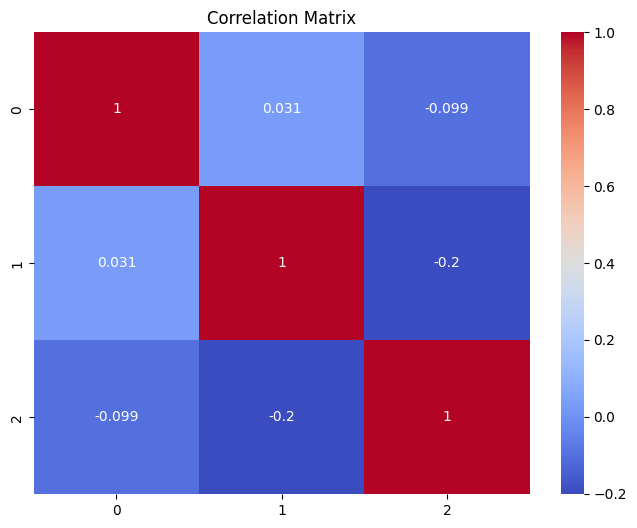

In [28]:
# Visualization: Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

In [44]:
# Select variables with an absolute value of the Correlation Coefficient above a certain threshold
threshold = -0.01

selected_vars = []  # Create an empty matrix

for i in range(cor_matrix.shape[0]):
    for j in range(i+1, cor_matrix.shape[1]):
        if abs(cor_matrix[i, j]) > threshold:
            selected_vars.extend([i, j])
            

selected_vars    

[0, 1, 0, 2, 1, 2]

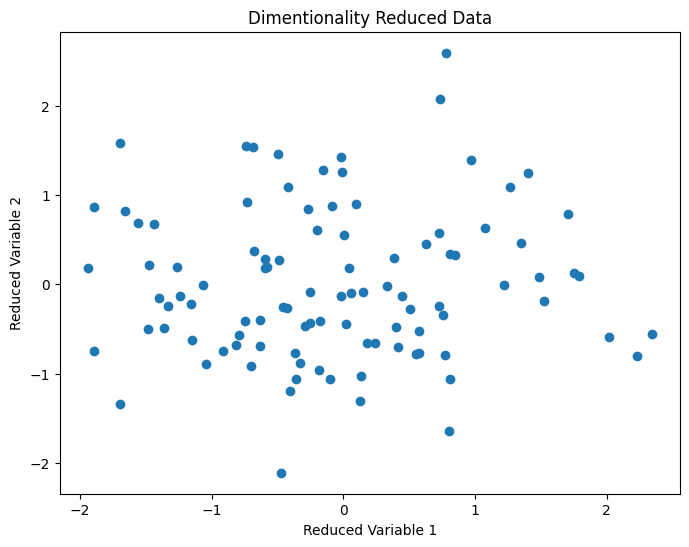

In [45]:
# Generate dimensional data with selected variables
if selected_vars:
    reduced_data = data[:, list(set(selected_vars))]
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
    plt.xlabel('Reduced Variable 1')
    plt.ylabel('Reduced Variable 2')
    plt.title('Dimentionality Reduced Data')
    plt.show()
else:
    print('No dimension reduction as no variables were selected')